### Problem Statement
Many different industries need predictive maintenance solutions to reduce risks and gain actionable insights through processing data from their equipment.
Although system failure is a very general issue that can occur in any machine, predicting the failure and taking steps to prevent such failure is most important for any machine or software application.
Predictive maintenance evaluates the condition of equipment by performing online monitoring. The goal is to perform maintenance before the equipment degrades or breaks down.
This Capstone project is aimed at predicting the machine breakdown by identifying the anomalies in the data.
The data we have contains about 18000+ rows collected over few days. The column ‘y’ contains the binary labels, with 1 denoting there is an anomaly. The rest of the columns are predictors.  


### 1. Import Libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### 2. Loading Data

In [22]:
import pandas as pd

# File path
file_path = r"C:\Users\parma\Downloads\AnomaData (5).xlsx"
df = pd.read_excel(file_path)


In [23]:
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [24]:
df.columns

Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'y.1'],
      dtype='object')

In [25]:
df.describe()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
count,18398,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,1999-05-15 01:20:42.728557312,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,...,-3.357339,0.380519,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258,0.001033
min,1999-05-01 00:00:00,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,...,-3652.989000,-187.943440,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229,0.000000
25%,1999-05-08 03:36:30,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,...,29.984624,-3.672684,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805,0.000000
50%,1999-05-14 18:39:00,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,...,29.984624,0.294846,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710,0.000000
75%,1999-05-22 06:01:30,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,...,29.984624,5.109543,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087,0.000000
max,1999-05-29 00:06:00,1.000000,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,...,40.152348,14.180588,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510,1.000000
std,NaN,0.081822,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,...,348.256716,6.211598,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721,0.032120


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

### 3. Exploratory Data Analysis (EDA)

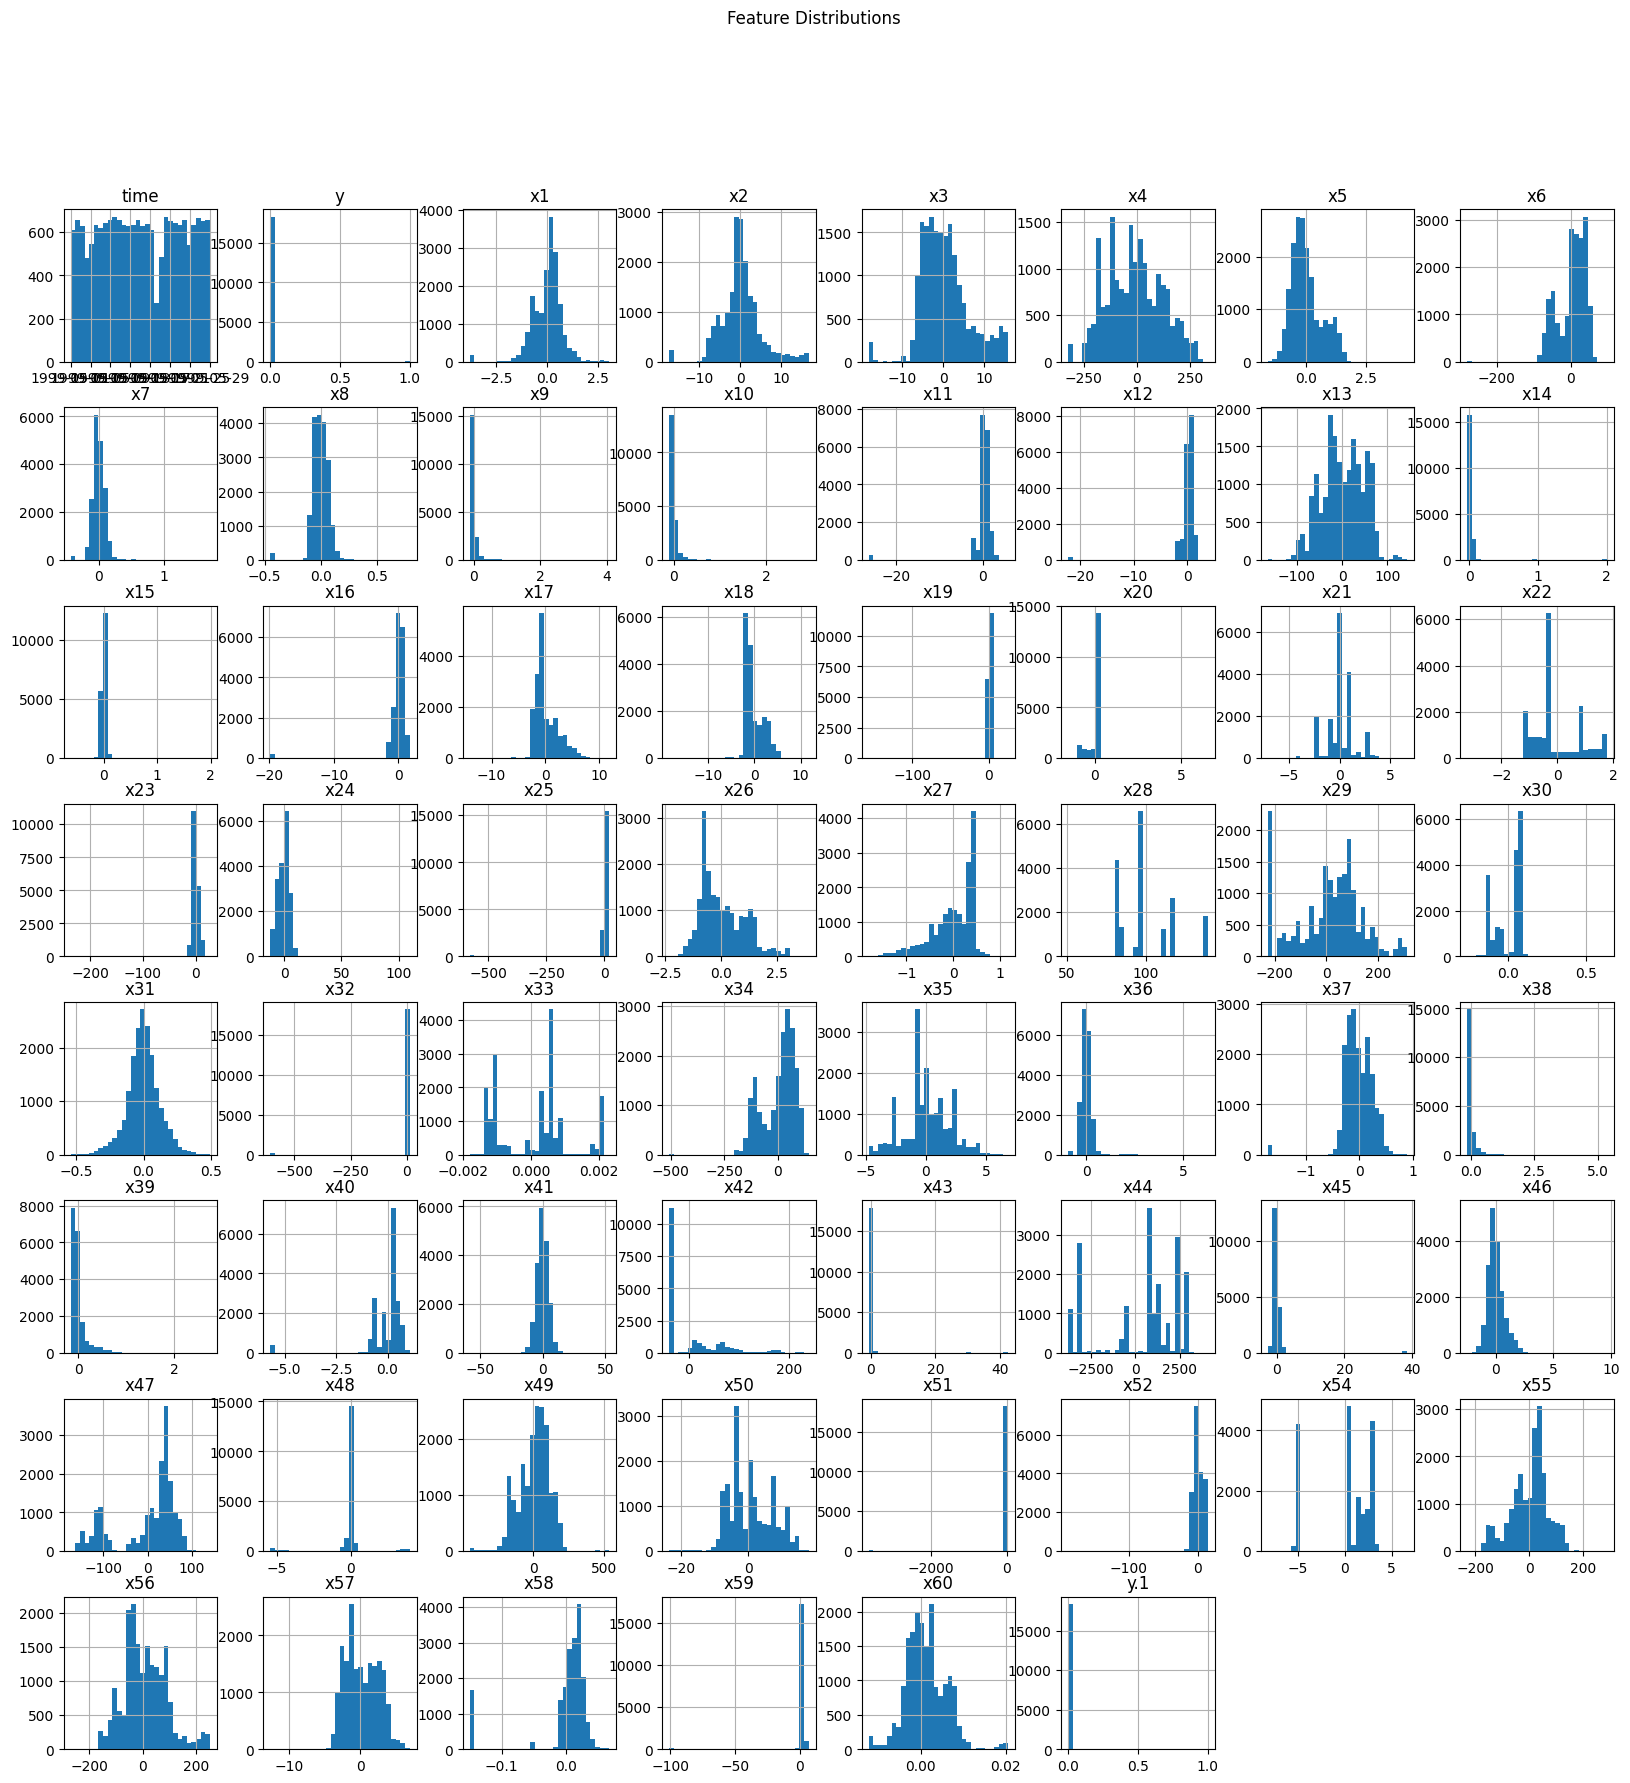

In [27]:
## Plot the distribution of each feature.
df.hist(figsize=(20, 20), bins=30)
plt.suptitle('Feature Distributions')
plt.show()


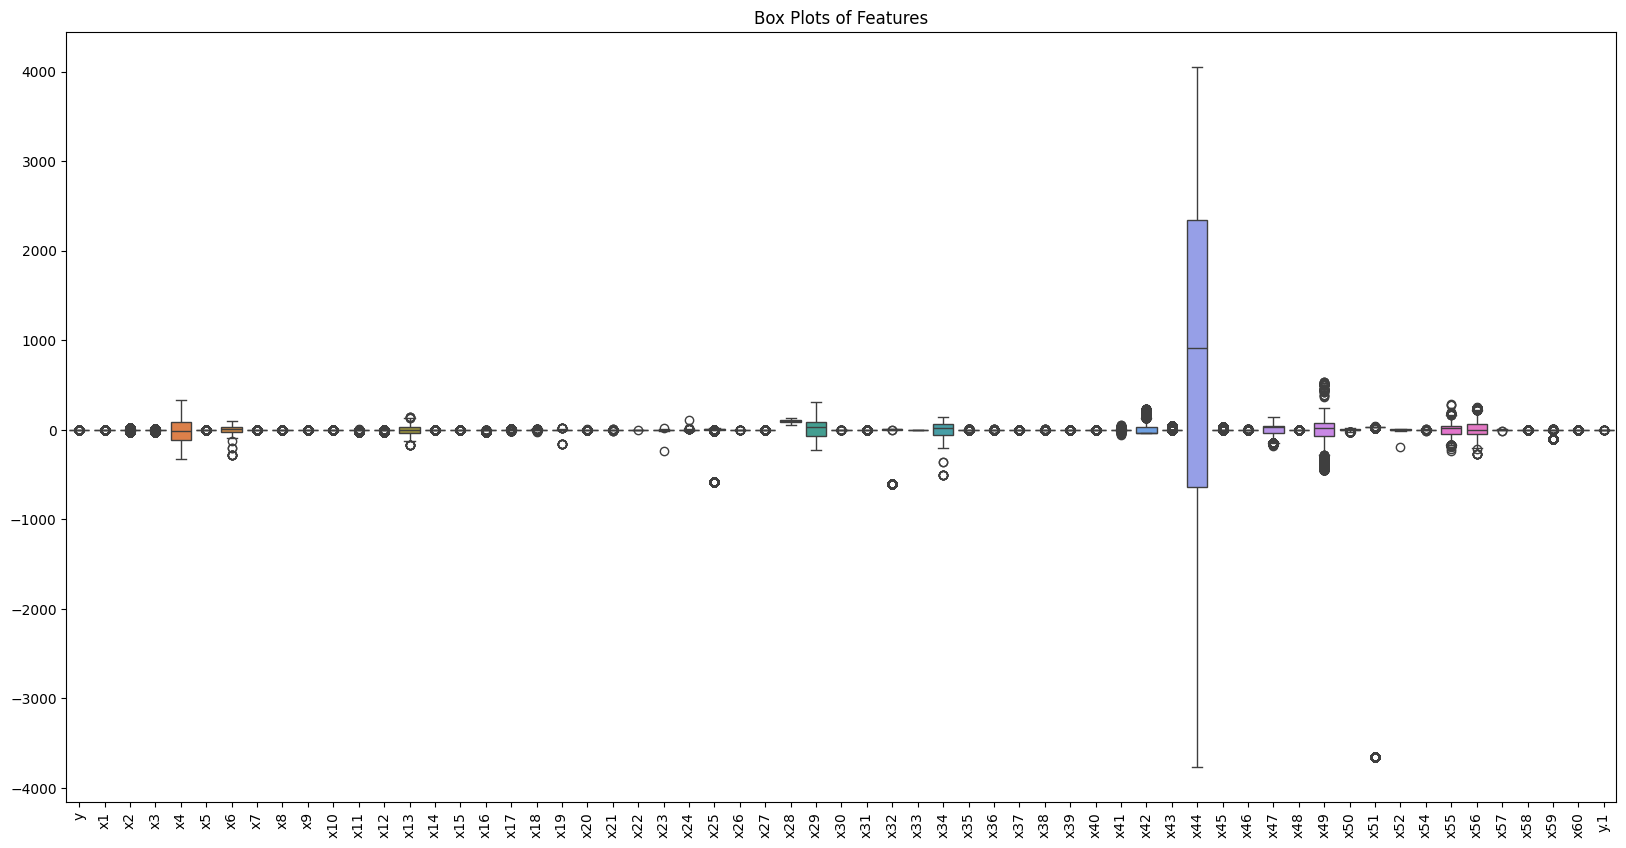

In [28]:
## Box Plots: Identify outliers in features.
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plots of Features')
plt.show()


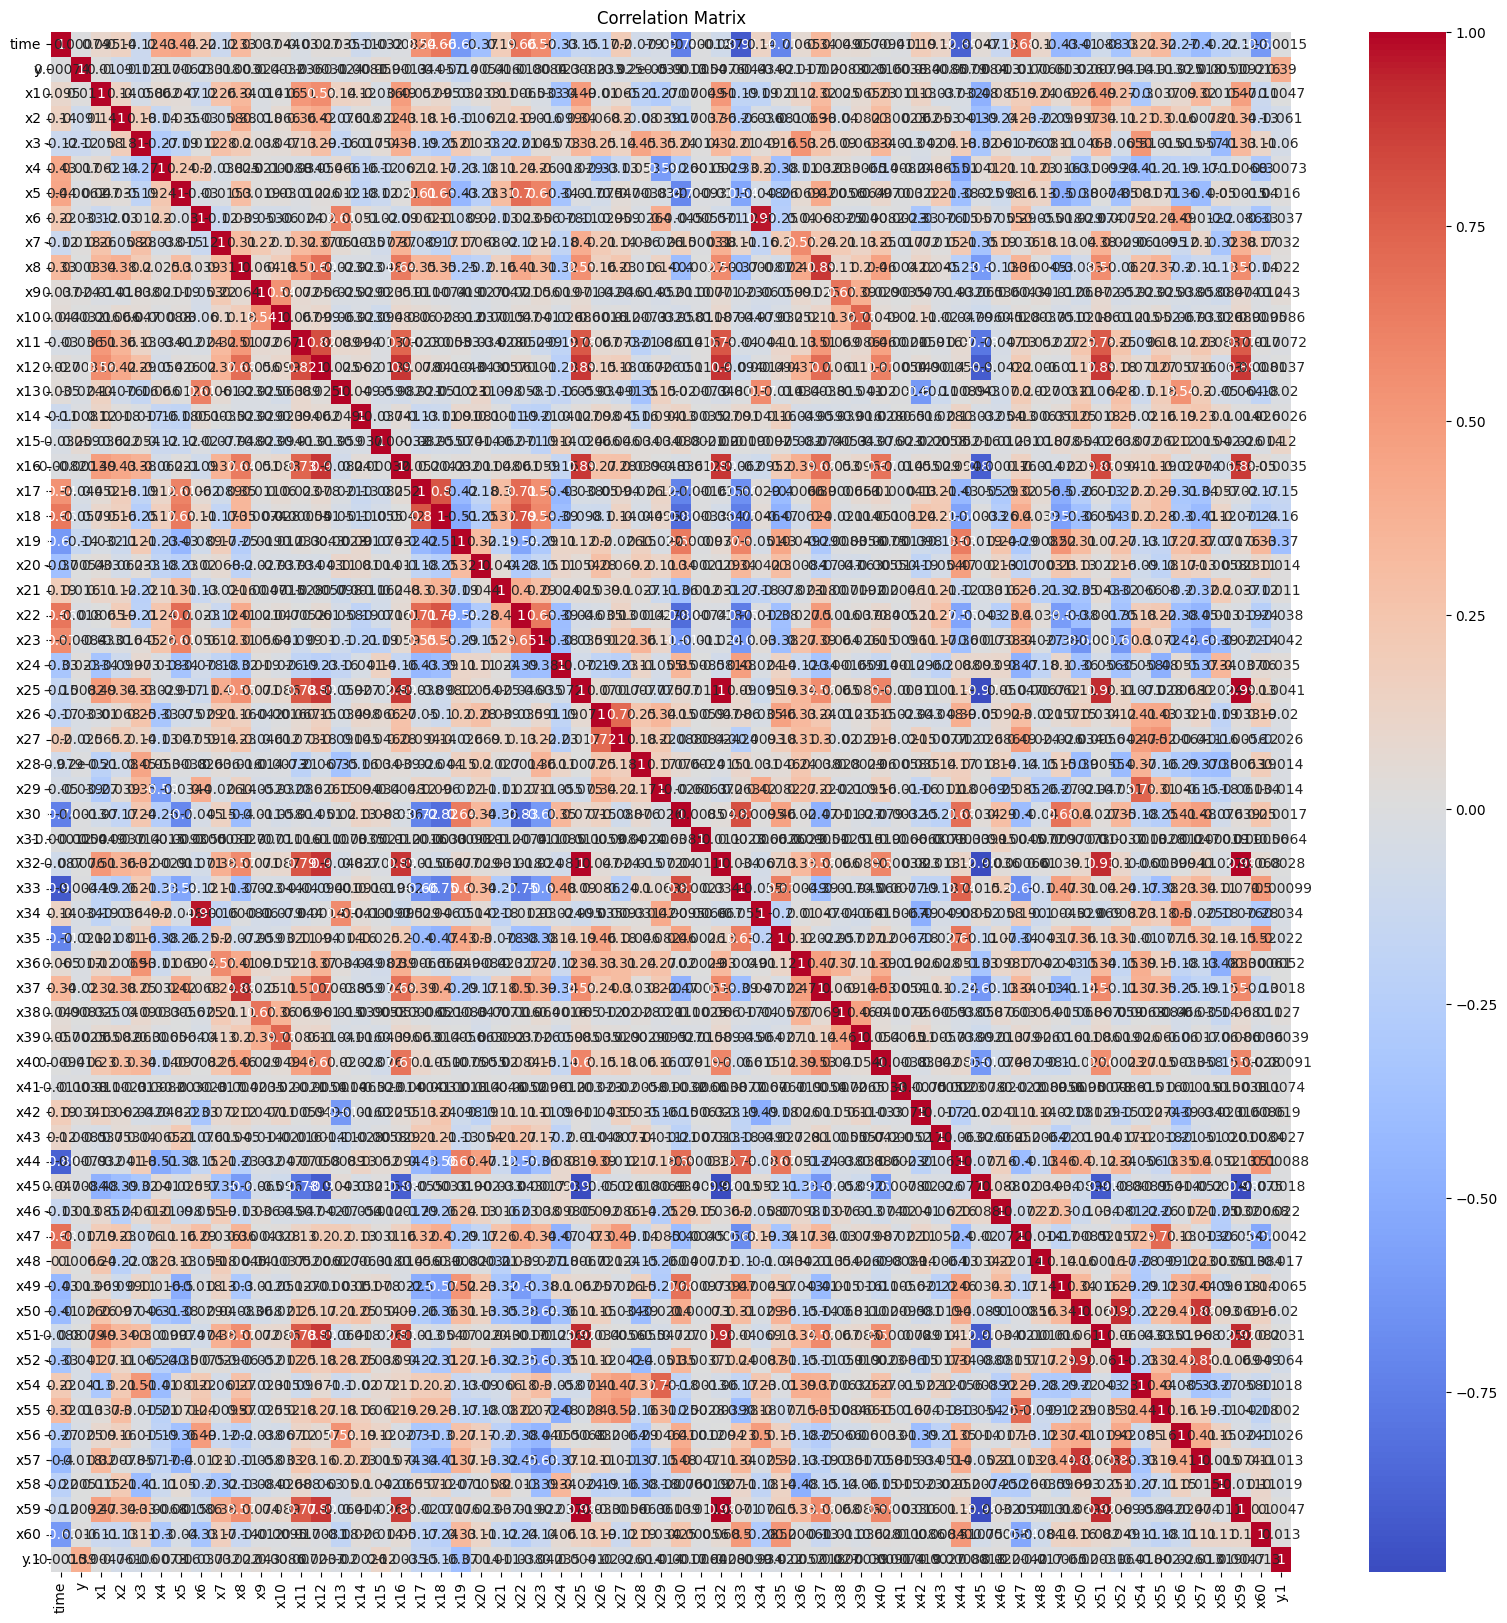

In [29]:
## Correlation Matrix: Visualize correlations between features.
plt.figure(figsize=(20, 20))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


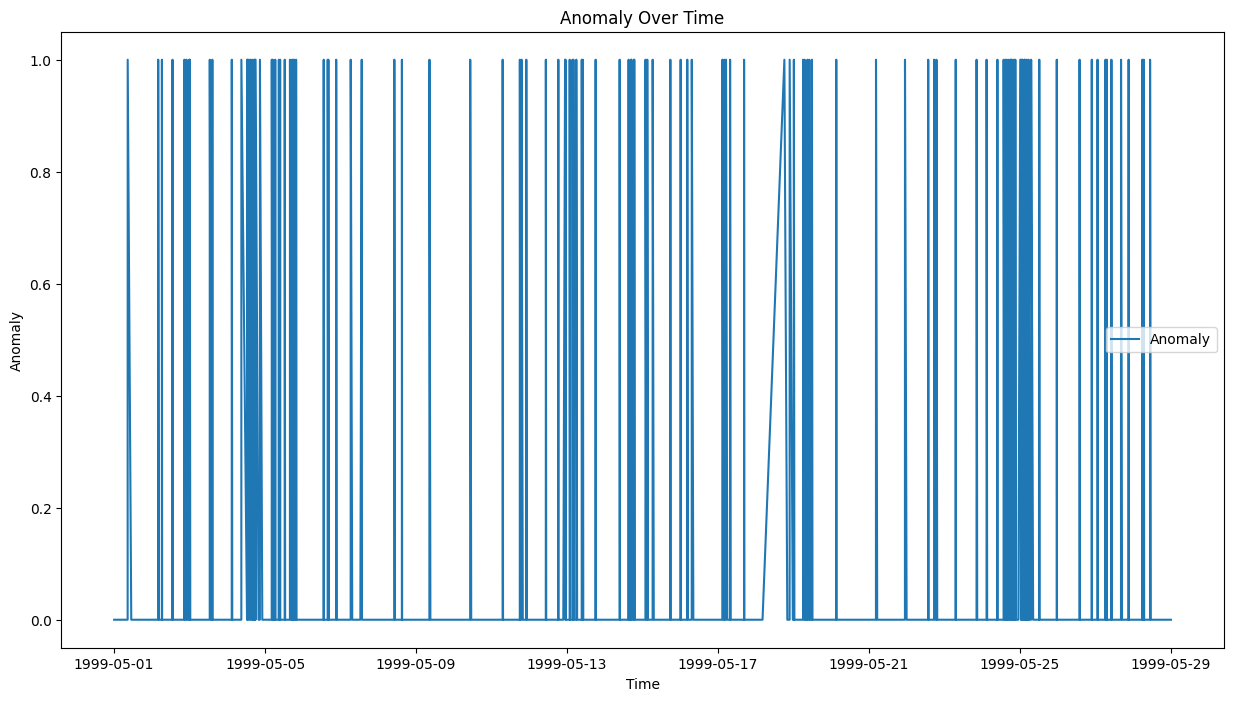

In [30]:
## Time Series Analysis: Plot features and target over time to observe trends.
plt.figure(figsize=(15, 8))
plt.plot(df['time'], df['y'], label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Anomaly')
plt.title('Anomaly Over Time')
plt.legend()
plt.show()


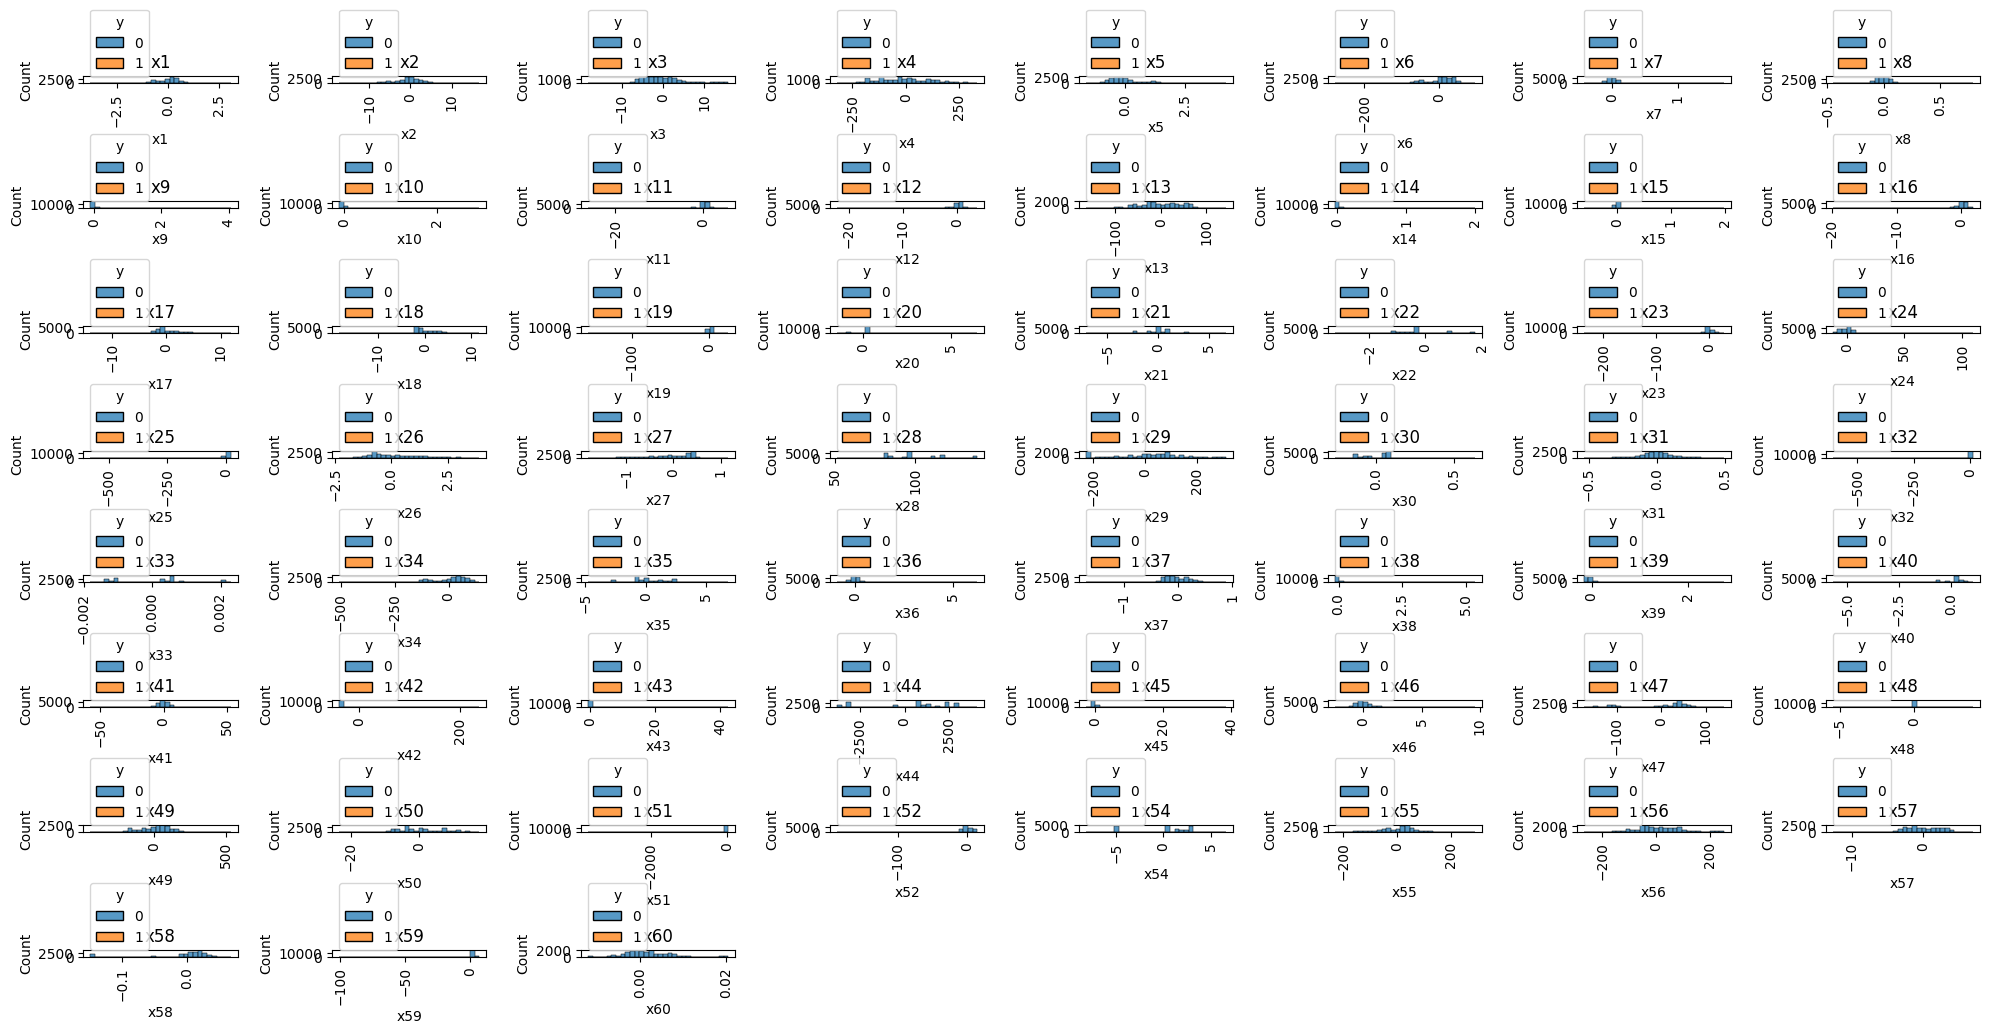

In [31]:
## Feature Distribution by Anomaly Status: Compare distributions of features for anomalies vs. non-anomalies.
plt.figure(figsize=(20, 10))
for i, column in enumerate(df.columns[2:-1], 1):
    plt.subplot(8, 8, i)  # Adjust according to the number of features
    sns.histplot(data=df, x=column, hue='y', multiple='stack', bins=30)
    plt.title(column)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### 4. Data Cleaning

In [32]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Impute missing values with median (for numerical features)
df.fillna(df.median(), inplace=True)


Missing Values:
 time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64


In [33]:
## Handle Outliers:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers
outliers = (abs(z_scores) > 3).sum(axis=0)
print("Outliers per feature:\n", outliers)


Outliers per feature:
 y       124
x1      285
x2      465
x3      221
x4        0
       ... 
x57       2
x58    1670
x59     192
x60     212
y.1      19
Length: 61, dtype: int64


In [34]:
## IQR Method:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]



In [35]:
df.set_index('time', inplace=True)

# Separate features and target variable
X = df.drop(columns=['y'])  # Exclude 'y' and any non-numeric columns
y = df['y']

# Ensure all columns in X are numeric
X = X.select_dtypes(include=[float, int])  # Select only numeric columns

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



### 5. Feature Engineering

In [36]:
# Example: Interaction term between x1 and x2
df['x1_x2_interaction'] = df['x1'] * df['x2']

In [37]:
## Polynomial Features (optional)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)


In [38]:
## Dimensionality Reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Choose number of components based on explained variance
X_pca = pca.fit_transform(X_scaled)


### 6. Model Selection and Training

In [39]:
## model selection
from sklearn.svm import OneClassSVM

model = OneClassSVM()


In [40]:
## Train-Test Split:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [41]:
## Model fitting:
model.fit(X_train)

OneClassSVM()

In [42]:
## Predict Anomalies:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


### 7. Model Validation

In [43]:
## Evaluate Performance:

from sklearn.metrics import classification_report, roc_auc_score

# If the model provides binary predictions
print("Train Classification Report:\n", classification_report(y_train, y_pred_train))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_test)
print('ROC-AUC Score:', roc_auc)


Train Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00     14616
           1       0.00      0.24      0.01       102

    accuracy                           0.00     14718
   macro avg       0.00      0.08      0.00     14718
weighted avg       0.00      0.00      0.00     14718

Test Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      3658
           1       0.00      0.18      0.00        22

    accuracy                           0.00      3680
   macro avg       0.00      0.06      0.00      3680
weighted avg       0.00      0.00      0.00      3680

ROC-AUC Score: 0.34282270490581046


C:\Users\parma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\parma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\parma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

### 8. Model Deployment

In [44]:
## Save the Model:
import joblib

joblib.dump(model, 'anomaly_detection_model.pkl')


['anomaly_detection_model.pkl']

In [45]:
## Load the Model
model = joblib.load('anomaly_detection_model.pkl')
